In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn import metrics # for checking the model accuracy
from sklearn.model_selection import train_test_split
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn.naive_bayes import GaussianNB


In [20]:

# Loading the dataset to a pandas DataFrame
corona_df = pd.read_csv(r'C:\Users\emaduzzaman\Desktop\COVID19DetectionMachineLearning\DatasetFrrom Kaggle.csv')



In [21]:
corona_df.head()

,ID,Oxygen,PulseRate,Temperature,Result
0,0,98,65,95,Negative
1,1,96,92,95,Negative
2,2,95,92,99,Negative
3,3,97,56,96,Negative
4,4,88,94,98,Positive


In [22]:
# number of rows and columns
corona_df.shape

(10000, 5)

In [23]:
corona_df.describe()  #describe --> statistical measures of the data

,ID,Oxygen,PulseRate,Temperature
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,92.548900,84.976600,100.000700
std,2886.89568,4.611197,26.305841,3.185045
min,0.00000,85.000000,40.000000,95.000000
25%,2499.75000,88.000000,63.000000,97.000000
50%,4999.50000,93.000000,85.000000,100.000000
75%,7499.25000,97.000000,108.000000,103.000000
max,9999.00000,100.000000,130.000000,105.000000


In [24]:
corona_df.value_counts()

ID    Oxygen  PulseRate  Temperature  Result  
0     98      65         95           Negative    1
6670  100     114        95           Negative    1
6663  87      49         99           Positive    1
6664  88      101        105          Positive    1
6665  91      68         102          Positive    1
                                                 ..
3333  97      122        103          Negative    1
3334  95      45         100          Negative    1
3335  93      124        95           Negative    1
3336  89      119        97           Positive    1
9999  85      52         99           Positive    1
Length: 10000, dtype: int64

In [25]:
corona_df.groupby("Result").mean()


,ID,Oxygen,PulseRate,Temperature
Result,,,,
Negative,4966.669860,96.124551,83.648503,99.166267
Positive,5032.461723,88.958918,86.310020,100.838477


In [26]:
# separating data and Labels
X = corona_df.drop(columns="Result", axis=1)
Y = corona_df["Result"]

In [27]:
print(X)
print(Y)

        ID  Oxygen  PulseRate  Temperature
0        0      98         65           95
1        1      96         92           95
2        2      95         92           99
3        3      97         56           96
4        4      88         94           98
...    ...     ...        ...          ...
9995  9995      95        124           97
9996  9996      88         70          100
9997  9997      99         56          105
9998  9998      92         49           98
9999  9999      85         52           99

[10000 rows x 4 columns]
0       Negative
1       Negative
2       Negative
3       Negative
4       Positive
          ...   
9995    Negative
9996    Positive
9997    Negative
9998    Positive
9999    Positive
Name: Result, Length: 10000, dtype: object


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=1)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(10000, 4) (7000, 4) (3000, 4)


In [30]:
print(X_train)
print(Y_train)

        ID  Oxygen  PulseRate  Temperature
4562  4562      90        106          103
2467  2467      97         63          102
3072  3072      94         97           95
5005  5005      86         54           95
8736  8736      93         82          104
...    ...     ...        ...          ...
8087  8087      98         85           98
2989  2989      99         95           95
3027  3027      88         68           99
2396  2396     100         56           96
3272  3272      85         54           99

[7000 rows x 4 columns]
4562    Positive
2467    Negative
3072    Negative
5005    Positive
8736    Positive
          ...   
8087    Negative
2989    Negative
3027    Positive
2396    Negative
3272    Positive
Name: Result, Length: 7000, dtype: object


In [31]:
model = LogisticRegression()

In [32]:
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

In [33]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train_encoded)

LogisticRegression()

In [34]:
X_train_prediction = model.predict(X_train)

In [35]:
# Convert predicted labels to match the data type of true labels
X_train_prediction_labels = ['Positive' if pred == 1 else 'Negative' for pred in X_train_prediction]



In [36]:

# Calculate accuracy
training_data_accuracy = accuracy_score(Y_train, X_train_prediction_labels)

print('Accuracy on training data:', training_data_accuracy)



Accuracy on training data: 0.9058571428571428


In [37]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9058571428571428


In [38]:
Y_test_prediction = model.predict(X_test)

In [39]:

# Convert predicted labels to match the data type of true labels for test data
Y_test_prediction_labels = ['Positive' if pred == 1 else 'Negative' for pred in Y_test_prediction]

In [40]:
# Calculate accuracy
test_data_accuracy = accuracy_score(Y_test, Y_test_prediction_labels)

print('Accuracy on test data:', test_data_accuracy)

Accuracy on test data: 0.9113333333333333


In [41]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.9113333333333333


In [65]:
input_data = (65,94,118,75) # 'Oxygen', 'PulseRate', 'Temperature'
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if prediction[0] == 1:
    print('The result is Positive')
else:
    print('The result is Negative')


The result is Negative


c:\Users\emaduzzaman\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
corona_df.keys()

Index(['ID', 'Oxygen', 'PulseRate', 'Temperature', 'Result'], dtype='object')

In [44]:
# Gathering information about the dataset
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           10000 non-null  int64 
 1   Oxygen       10000 non-null  int64 
 2   PulseRate    10000 non-null  int64 
 3   Temperature  10000 non-null  int64 
 4   Result       10000 non-null  object
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


In [45]:
corona_df.isnull()

,ID,Oxygen,PulseRate,Temperature,Result
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9995,False,False,False,False,False
9996,False,False,False,False,False
9997,False,False,False,False,False
9998,False,False,False,False,False


In [46]:
# deleting the empty rows 
corona_df = corona_df.dropna()
corona_df.drop_duplicates(inplace=True)
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           10000 non-null  int64 
 1   Oxygen       10000 non-null  int64 
 2   PulseRate    10000 non-null  int64 
 3   Temperature  10000 non-null  int64 
 4   Result       10000 non-null  object
dtypes: int64(4), object(1)
memory usage: 468.8+ KB


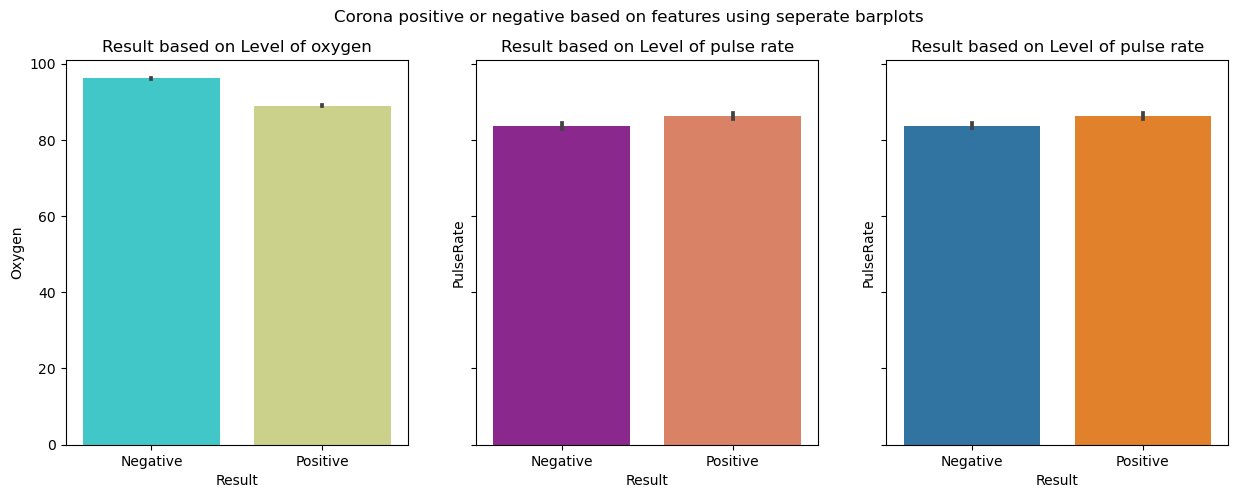

In [47]:
# Barplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

fig.suptitle("Corona positive or negative based on features using seperate barplots")

axes[0].set_title("Result based on Level of oxygen")
axes[1].set_title("Result based on Level of pulse rate")
axes[2].set_title("Result based on Level of pulse rate")

sns.barplot(ax=axes[0], x='Result', y='Oxygen', data=corona_df, palette='rainbow')
sns.barplot(ax=axes[1], x='Result', y='PulseRate', data=corona_df, palette='plasma')
sns.barplot(ax=axes[2], x='Result', y='PulseRate', data=corona_df)
plt.show()

In [48]:
# seperationg features and results
features_df = corona_df[['Oxygen', 'PulseRate', 'Temperature']]
X = np.array(features_df)
y = np.array(corona_df['Result'])

In [49]:
data = np.random.rand(10, 10)  # Example 10x10 numeric data
numeric_df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(10)])

In [50]:
correlation_matrix = numeric_df.corr().round(2)

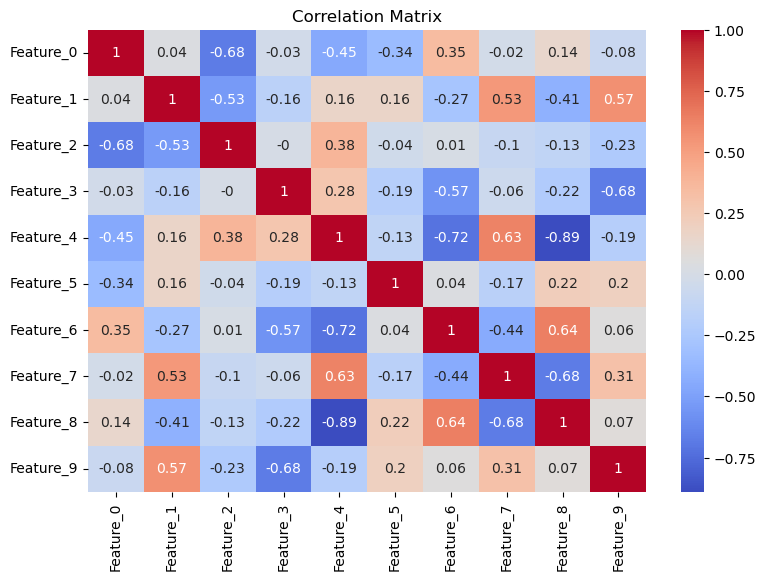

In [56]:
plt.figure(figsize=(9, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

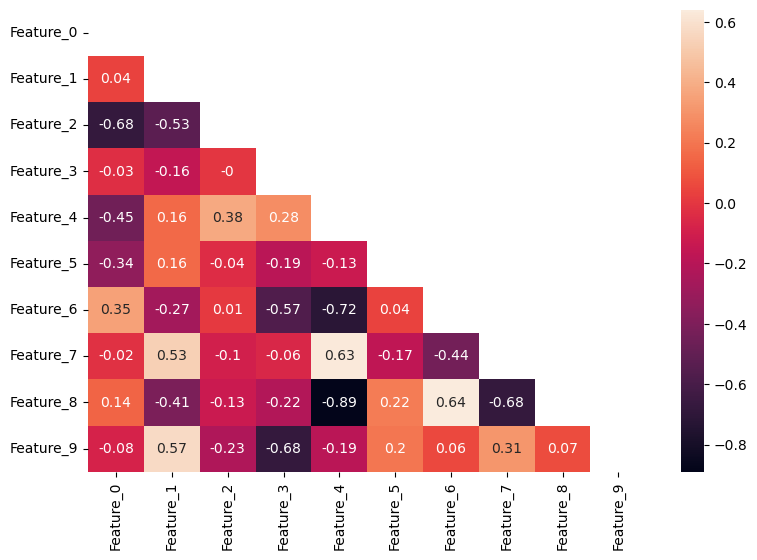

In [ ]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

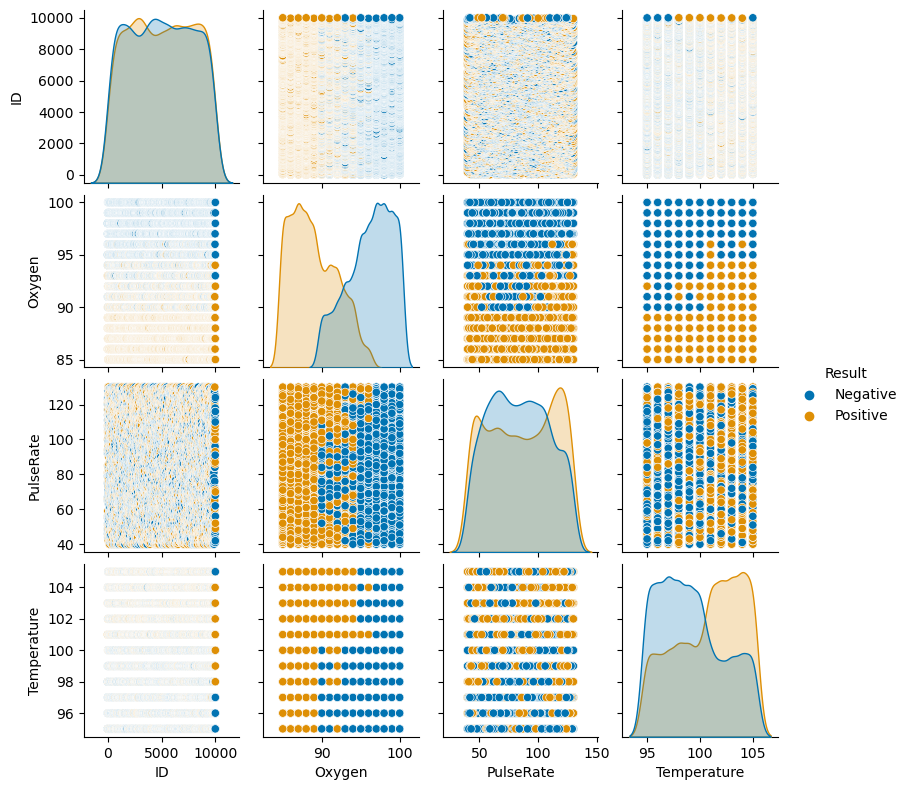

In [53]:
# let's create pairplot to visualise the data for each pair of attributes
sns.pairplot(corona_df, hue="Result", height = 2, palette = 'colorblind');

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)

print("X_train shape: ", X_train.shape)

print("X_test shape: ", X_test.shape)

print("y_train shape: ", y_train.shape)

print("y_test shape: ", y_test.shape)

X_train shape:  (7000, 3)
X_test shape:  (3000, 3)
y_train shape:  (7000,)
y_test shape:  (3000,)


In [58]:
#importing the necessary package to use the classification algorithm

from sklearn import svm #for Support Vector Machine (SVM) Algorithm

model_svm = svm.SVC() #select the algorithm

model_svm.fit(X_train, y_train) #train the model with the training dataset

y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model

# checking the accuracy of the algorithm.

# by comparing predicted output by the model and the actual output

score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)

print('The accuracy of the SVM is: {}'.format(score_svm))


# save the accuracy score

score = set()

score.add(('SVM', score_svm))

The accuracy of the SVM is: 0.9427


In [60]:
# importing the necessary package to use the classification algorithm

from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

model_dt = DecisionTreeClassifier(random_state=4)

model_dt.fit(X_train, y_train) #train the model with the training dataset

y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model

# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output

score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)


print('The accuracy of the DT is: {}'.format(score_dt))


# save the accuracy score
score.add(('DT', score_dt))

The accuracy of the DT is: 1.0


In [61]:
# importing the necessary package to use the classification algorithm

from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours

#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm

model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class

model_knn.fit(X_train, y_train) #train the model with the training dataset

y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model

# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)


print('The accuracy of the KNN is: {}'.format(score_knn))


# save the accuracy score
score.add(('KNN', score_knn))

The accuracy of the KNN is: 0.9817


In [62]:
# importing the necessary package to use the classification algorithm

from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm

model_lr = LogisticRegression()

model_lr.fit(X_train, y_train) #train the model with the training dataset

y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model

# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output

score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)


print('The accuracy of the LR is: {}'.format(score_lr))


# save the accuracy score
score.add(('LR', score_lr))

The accuracy of the LR is: 0.9207


In [63]:
# importing the necessary package to use the classification algorithm

from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

model_nb.fit(X_train, y_train) #train the model with the training dataset

y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model

# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output

score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)


print('The accuracy of the NB is: {}'.format(score_nb))


# save the accuracy score
score.add(('NB', score_nb))

The accuracy of the NB is: 0.8863


In [64]:
print("The accuracy scores of different Models:")
for s in score:
    print(s)

The accuracy scores of different Models:
('NB', 0.8863)
('LR', 0.9207)
('KNN', 0.9817)
('SVM', 0.9427)
('DT', 1.0)
